In [7]:
import pandas as pd
import numpy as np
import os
#from numpy import *
import numpy as np

filename='./edges_sim.csv'
def load_dat(path=filename):
    if os.path.isfile(path):
        df=pd.read_csv(filename,sep=',',header=0)
        datamat=np.array(df.iloc[:,0:-1].values)
        #datamat=np.c_[np.ones((datamat.shape[0],1)),datamat]
        labelmat=df['label'].values
        return [df,datamat,labelmat]
    else:
        print('file not exist')

df,dataArr,labelMat=load_dat(filename)

In [34]:
import copy
k=[]
for e in dataArr[:,3:5]:
    k.append((e[0],e[1]))
for i in range(len(k)):
    c=copy.copy(k)
    e=(dataArr[i,3],dataArr[i,4])
    c.pop(i)
    if e in c :
        print(i)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


得出来的权重： [0.29426858 0.60852869]
SGD预测值： (6021,)
lr的均方误差为： 0.08899069252501919
SGD的均方误差为： 0.08901821249846076
Ridge的均方误差为： 0.08899069191472314
884 0.09402985074626866 0.8698092031425365 0.45077450020623266


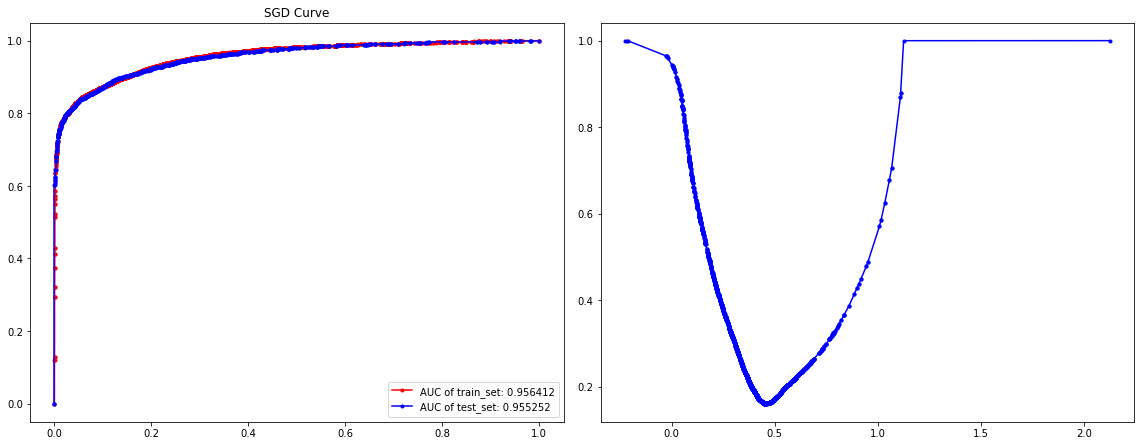

In [44]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,auc,roc_curve,roc_auc_score,f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(16,12))

 
def load_data(path=filename):
    if os.path.isfile(path):
        df=pd.read_csv(path,sep=',',header=0,usecols=['sim_content','sim_embs','label'])
        datamat=np.array(df.iloc[:,0:2].values)
        #datamat=np.c_[np.ones((datamat.shape[0],1)),datamat]
        labelmat=np.array(df['label'].values)
        labelmat=labelmat.reshape(-1,1)
        return [datamat,labelmat]
    else:
        print('file not exist')
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return
        
def linearmodel():
 
    # 1、加载数据集
 
    data,target = load_data()
    x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.25)
    ploy
    # 2、标准化处理
 
    # 特征值处理
    std_x = StandardScaler()
    x_train = std_x.fit_transform(x_train)
    x_test = std_x.transform(x_test)
 
 
    # 目标值进行处理
 
    std_y  = StandardScaler()
    y_train = std_y.fit_transform(y_train)
    y_test = std_y.transform(y_test)
 
    # 3、估计器流程
 
    # LinearRegression
    lr = LinearRegression()
    lr.fit(x_train,y_train)
 
    # print(lr.coef_)
 
    y_lr_predict = lr.predict(x_test)
    y_lr_train = lr.predict(x_train)
    y_lr_predict = std_y.inverse_transform(y_lr_predict)
    y_lr_train = std_y.inverse_transform(y_lr_train)
 
    #print("Lr预测值：",y_lr_predict)
 
 
    # SGDRegressor
    sgd = SGDRegressor()
 
    sgd.fit(x_train,y_train)
   
 
    # print(sgd.coef_)
 
    y_sgd_predict = sgd.predict(x_test)
    y_sgd_train = sgd.predict(x_train)
    y_sgd_predict = std_y.inverse_transform(y_sgd_predict)
    y_sgd_train = std_y.inverse_transform(y_sgd_train)
    print("得出来的权重：", sgd.coef_)

    print("SGD预测值：",y_sgd_predict.shape)
 
    # 带有正则化的岭回归
 
    rd = Ridge(alpha=0.01)
 
    rd.fit(x_train,y_train)
    y_rd_predict = rd.predict(x_test)
    y_rd_predict = std_y.inverse_transform(y_rd_predict)

    
    #print(rd.coef_)
 
    # 两种模型评估结果
    y_test = std_y.inverse_transform(y_test)
    y_train = std_y.inverse_transform(y_train)
    print("lr的均方误差为：",mean_squared_error(y_test,y_lr_predict))
    print("SGD的均方误差为：",mean_squared_error(y_test,y_sgd_predict))
    print("Ridge的均方误差为：",mean_squared_error(y_test,y_rd_predict))
    
    
    #plt.subplot(1,2,1)
    #plt.title("LR Curve")
    #fpr_train, tpr_train, _ = roc_curve(y_train,y_lr_train, pos_label=1)
    #fpr_test, tpr_test, _ = roc_curve(y_test, y_lr_predict, pos_label=1)
    #plt.plot(fpr_train,tpr_train,marker = '.',color='red',label='AUC of train_set: %4f' %auc(fpr_train, tpr_train))
    #plt.plot(fpr_test,tpr_test,marker = '.',color='blue',label='AUC of test_set: %4f' %auc(fpr_test, tpr_test))
    #plt.legend(loc='lower right')
    #print("roc_auc_score=",roc_auc_score(np.r_[y_train,y_test],np.r_[y_lr_train,y_lr_predict]))
    plt.subplot(2,2,1)
    plt.title("SGD Curve")
    fpr_train, tpr_train, thre_train = roc_curve(y_train,y_sgd_train, pos_label=1)
    fpr_test, tpr_test, thre_test = roc_curve(y_test, y_sgd_predict, pos_label=1)
    plt.plot(fpr_train,tpr_train,marker = '.',color='red',label='AUC of train_set: %4f' %auc(fpr_train, tpr_train))
    plt.plot(fpr_test,tpr_test,marker = '.',color='blue',label='AUC of test_set: %4f' %auc(fpr_test, tpr_test))
    plt.legend(loc='lower right')
    
    mi,threshold=optimal_thre(fpr_train, tpr_train, thre_train,0)
    
    #plt.show()
    plt.tight_layout()
    #AUC = auc(fpr, tpr)
    #print('auc=',AUC)
    return None

linearmodel()



24083
904 0.0902448924367474 0.8402211601536875 0.17442116193812007
roc_auc_score= 0.9234422612167701
0.9234422612167701 0.9592072132451903
24083
2733 0.2342317690518539 0.7750395238538083 0.698669970035553
roc_auc_score= 0.839420820751112
0.839420820751112 0.8507847991749811


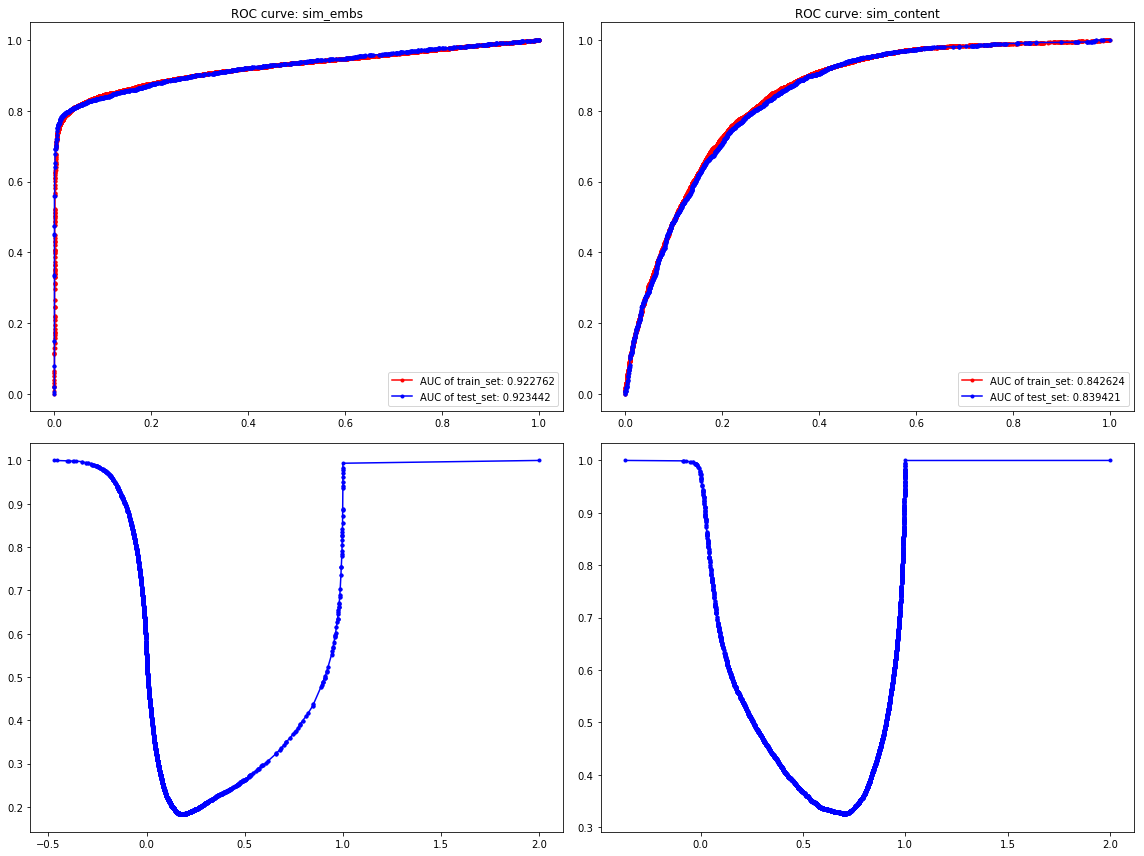

In [36]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,auc,roc_curve,f1_score,auc,roc_auc_score
from sklearn.metrics import auc, f1_score, precision_recall_curve, roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import pprint as pp

plt.figure(figsize=(16,12))

 
def load_data(col,path=filename):
    if os.path.isfile(path):
        df=pd.read_csv(path,sep=',',header=0,usecols=[col,'label'])
        print(df.shape[0])
        datamat=np.array(df.iloc[:,0:1].values)
        #datamat=np.c_[np.ones((datamat.shape[0],1)),datamat]
        labelmat=np.array(df['label'].values)
        labelmat=labelmat.reshape(-1,1)
        return [datamat,labelmat]
    else:
        print('file not exist')
        
def optimal_thre(fpr,tpr,thre,n):
    mi=2
    dis=np.zeros((len(fpr),1))
    for i in range(len(fpr)):
        dis[i]=((fpr[i])**2+(1-tpr[i])**2)**(0.5)
        if dis[i]<=mi:
            mi=dis[i]
            threshold=thre[i]
            index=i
    plt.subplot(2,2,n+2)
    plt.plot(thre,dis,marker = '.',color='blue',label='optimal: %4f' %threshold)
    print(index,fpr[index],tpr[index],thre[index])
    return (mi,threshold)
        
def linearmodel(n,col='sim_embs'):
    data,target = load_data(col)
    
    x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.25)
    #data,x_test,target,y_test = train_test_split(data,target,test_size=0)
    
    fpr_train, tpr_train, thre_train = roc_curve(y_train, x_train,pos_label=1)
    fpr_test, tpr_test,thre_test = roc_curve(y_test, x_test, pos_label=1)
    mi,threshold=optimal_thre(fpr_train, tpr_train, thre_train,n)
    
    plt.subplot(2,2,n)
    plt.title('ROC curve: '+col)
    plt.plot(fpr_train,tpr_train,marker = '.',color='red',label='AUC of train_set: %4f' %auc(fpr_train, tpr_train))
    plt.plot(fpr_test,tpr_test,marker = '.',color='blue',label='AUC of test_set: %4f' %auc(fpr_test, tpr_test))
    plt.legend(loc='lower right')
    print("roc_auc_score=",roc_auc_score(y_test, x_test))
    plt.tight_layout()
    ps, rs, _ = precision_recall_curve(y_test, x_test)
    print(roc_auc_score(y_test, x_test), auc(rs, ps))
    #AUC = auc(fpr, tpr)
    #print('auc=',AUC)
    return None

linearmodel(1,col="sim_embs")
linearmodel(2,col="sim_content")



In [39]:
def gen_node_pairs(G, G2):
    training_nodes = set(list(G.nodes()))
    test_true_data = []
    for u, v in G2.edges():
        if u in training_nodes and v in training_nodes:
            test_true_data.append((u, v))
            
    test_false_data = randomly_choose_false_edges(
        list(training_nodes), list(G.edges()),list(G2.edges()), len(list(G2.edges()))
    )
    return (test_true_data, test_false_data)

def evaluate(embs, true_edges, false_edges):
    true_list = list()
    prediction_list = list()
    for edge in true_edges:
        true_list.append(1)
        prediction_list.append(get_score(embs, edge[0], edge[1]))
    for edge in false_edges:
        true_list.append(0)
        prediction_list.append(get_score(embs, edge[0], edge[1]))

    sorted_pred = prediction_list[:]
    sorted_pred.sort()
    threshold = sorted_pred[-len(true_edges)]

    y_pred = np.zeros(len(prediction_list), dtype=np.int32)
    for i in range(len(prediction_list)):
        if prediction_list[i] >= threshold:
            y_pred[i] = 1

    y_true = np.array(true_list)
    y_scores = np.array(prediction_list)
    ps, rs, _ = precision_recall_curve(y_true, y_scores)
    roc_auc_score(y_true, y_scores), f1_score(y_true, y_pred), auc(rs, ps)
    print(roc_auc_score(y_true, y_scores), f1_score(y_true, y_pred), auc(rs, ps))
    return (y_scores,y_true)

def get_score(embs, node1, node2):
    vector1 = embs[int(node1)]
    vector2 = embs[int(node2)]
    return np.dot(vector1, vector2) / (
        np.linalg.norm(vector1) * np.linalg.norm(vector2)
    )
def randomly_choose_false_edges(nodes, true_edges1,true_edges2, num):
    true_edges_set = set(true_edges1+true_edges2)
    tmp_list = list()
    all_flag = False
    for _ in range(num):
        trial = 0
        while True:
            x = nodes[random.randint(0, len(nodes) - 1)]
            y = nodes[random.randint(0, len(nodes) - 1)]
            trial += 1
            if trial >= 1000:
                all_flag = True
                break
            if x != y and (x, y) not in true_edges_set and (y, x) not in true_edges_set:
                tmp_list.append((x, y))
                break
        if all_flag:
            break
    return tmp_list

In [37]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
from sklearn.metrics import auc, f1_score, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import torch
import os.path as osp

rootpath="./BotProject/pre_data"
path_g='graph_cb.txt'
path_g=osp.join(rootpath,path_g)

def read_graph(path):
    with open(path,'r') as f:
        for line in f:
            if line:
                yield list(map(int,line.strip('\n').split()))

itr_graph = read_graph(path_g)
edge_label = np.array(list(itr_graph))

G=nx.DiGraph()
G.add_edges_from(zip(edge_label[:,0],edge_label[:,1]))
print(G.number_of_nodes())
print(G.number_of_edges())

G1=nx.DiGraph()
G2=nx.DiGraph()
for n1,n2,t in edge_label:
    if t==1:
        G1.add_edge(n1,n2)
    else:
        G2.add_edge(n1,n2)
print(G1.number_of_edges(),G2.number_of_edges())

90908
443399
417869 25530


In [40]:
import pandas as pd
plt.figure(figsize=(8,6))

pwd=osp.join(rootpath,'embs.npy')
embs=np.load(pwd,allow_pickle=True)
embs=embs.item()

test_data = gen_node_pairs(G1, G2)

<Figure size 576x432 with 0 Axes>

In [41]:
y_scores,y_true= evaluate(embs, test_data[0], test_data[1])
re=pd.DataFrame(columns=['node1','node2','y_scores','y_label'],data=np.c_[np.r_[test_data[0],test_data[1]],y_scores,y_true])
re.to_csv('./sim_embs.csv')

0.9156451797455549 0.8453029271613343 0.9377090247745257


   Unnamed: 0  node1    node2  y_scores  y_label
0           0    8.0   1464.0  0.787181      1.0
1           1    8.0   1986.0  0.082185      1.0
2           2    8.0  17191.0  0.103073      1.0
3           3    8.0  23214.0  0.787181      1.0
4           4   15.0     83.0  0.466360      1.0
   Unnamed: 0  node1    node2  sim_content  sim_embs  label
0           0    8.0   1464.0     0.747181  0.787181    1.0
1           1    8.0   1986.0     0.992301  0.082185    1.0
2           2    8.0  17191.0     0.724289  0.103073    1.0
3           3    8.0  23214.0     0.752167  0.787181    1.0
4           4   15.0     83.0     0.982943  0.466360    1.0
[[8.0000e+00 1.4640e+03]
 [8.0000e+00 1.9860e+03]
 [8.0000e+00 1.7191e+04]
 [8.0000e+00 2.3214e+04]
 [1.5000e+01 8.3000e+01]]
[[8.0000e+00 1.4640e+03]
 [8.0000e+00 1.9860e+03]
 [8.0000e+00 1.7191e+04]
 [8.0000e+00 2.3214e+04]
 [1.5000e+01 8.3000e+01]]
data origin len= 49034
tru_edge:  23504
tru_edge:  19300
fal_edge:  8626
total len= 27926
roc_

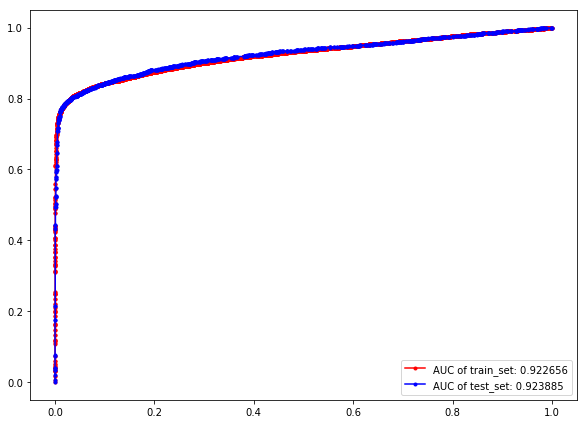

In [43]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,auc,roc_curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics


plt.figure(figsize=(16,6))

 
def load_data(col,path='./sim_embs.csv'):
    if os.path.isfile(path):
        df=pd.read_csv(path,sep=',',header=0)
        print(df[:5])
        edge=np.array(df.iloc[:,1:3].values)
        datamat=np.array(df.iloc[:,-2:-1].values)
        #datamat=np.c_[np.ones((datamat.shape[0],1)),datamat]
        labelmat=np.array(df.iloc[:,-1].values)
        labelmat=labelmat.reshape(-1,1)
        return [edge,datamat,labelmat]
    else:
        print('file not exist')
        
def linearmodel_test(n):
    edge,data,target = load_data(['node1','node2','y_scores','y_label'])
    edge1,data1,target1 = load_data(['node1','node2','label'],path='./edges_sim.csv')
    print(edge[:5,:])
    print(edge1[:5,:])
    print('data origin len=',data.shape[0])
    print('tru_edge: ',np.sum(target==1))
    inde=list(filter(lambda x: edge[x,:] in edge1, range(edge.shape[0])))
    data2=data[inde,:]
    target2=target[inde,:]
    
    print('tru_edge: ',np.sum(target2==1))
    print('fal_edge: ',np.sum(target2==0))
    print('total len=',len(data2))
    x_train,x_test,y_train,y_test = train_test_split(data1,target1,test_size=0.25)
    plt.subplot(1,2,n)
    fpr_train, tpr_train, _ = roc_curve(y_train,x_train, pos_label=1)
    fpr_test, tpr_test, _ = roc_curve(y_test, x_test, pos_label=1)
    plt.plot(fpr_train,tpr_train,marker = '.',color='red',label='AUC of train_set: %4f' %auc(fpr_train, tpr_train))
    plt.plot(fpr_test,tpr_test,marker = '.',color='blue',label='AUC of test_set: %4f' %auc(fpr_test, tpr_test))
    plt.legend(loc='lower right')
    print("roc_auc_score=",roc_auc_score(target2,data2))
    plt.tight_layout()
    #AUC = auc(fpr, tpr)
    #print('auc=',AUC)
    return None

linearmodel_test(1)
#linearmodel_test(2,col="sim_content")

